In [ ]:
!pip  install tensorflow


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump     

In [2]:

dataset = pd.read_csv('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/Corrosion_current_density.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   319 non-null    int64  
 1   Composition  319 non-null    object 
 2   Environment  319 non-null    int64  
 3   PH           319 non-null    float64
 4   [Cl-]        319 non-null    float64
 5   [SO42-]      319 non-null    float64
 6   VEC          319 non-null    float64
 7   σVEC         319 non-null    float64
 8   ΔSmix        319 non-null    float64
 9   ΔHmix        319 non-null    float64
 10  Ω            319 non-null    float64
 11  δ            319 non-null    float64
 12  rbar         319 non-null    float64
 13  Δχ           319 non-null    float64
 14  χbar         319 non-null    float64
 15  e/a          319 non-null    float64
 16  Tm           319 non-null    float64
 17  σT           319 non-null    float64
 18  Ec           319 non-null    float64
 19  Al      

In [ ]:
# Remove unnecessary axes
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)



dataset.isna().sum()

Environment     0
PH              0
[Cl-]           0
[SO42-]         0
VEC             0
σVEC            0
ΔSmix           0
ΔHmix           0
Ω               0
δ               0
rbar            0
Δχ              0
χbar            0
e/a             0
Tm              0
σT              0
Ec              0
Al              0
Co              0
Cr              0
Fe              0
Ni              0
Cu              0
Ti              0
V               0
Si              0
Mn              0
Mo              0
Nb              0
Hf              0
Ta              0
Zr              0
C               0
Sn              0
P               0
B               0
W               0
Y               0
icorr          15
dtype: int64

In [ ]:
# Remove blank lines
dataset = dataset.dropna()

# Remove duplicates
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 318
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   [SO42-]      304 non-null    float64
 4   VEC          304 non-null    float64
 5   σVEC         304 non-null    float64
 6   ΔSmix        304 non-null    float64
 7   ΔHmix        304 non-null    float64
 8   Ω            304 non-null    float64
 9   δ            304 non-null    float64
 10  rbar         304 non-null    float64
 11  Δχ           304 non-null    float64
 12  χbar         304 non-null    float64
 13  e/a          304 non-null    float64
 14  Tm           304 non-null    float64
 15  σT           304 non-null    float64
 16  Ec           304 non-null    float64
 17  Al           304 non-null    float64
 18  Co           304 non-null    float64
 19  Cr           

In [ ]:
# Split the data into X and y
y = dataset['icorr']

X = dataset.drop(['icorr'], axis=1)

# Pearson Correlation Analysis

# Only empirical parameters and environmental factors

<Figure size 1000x800 with 0 Axes>

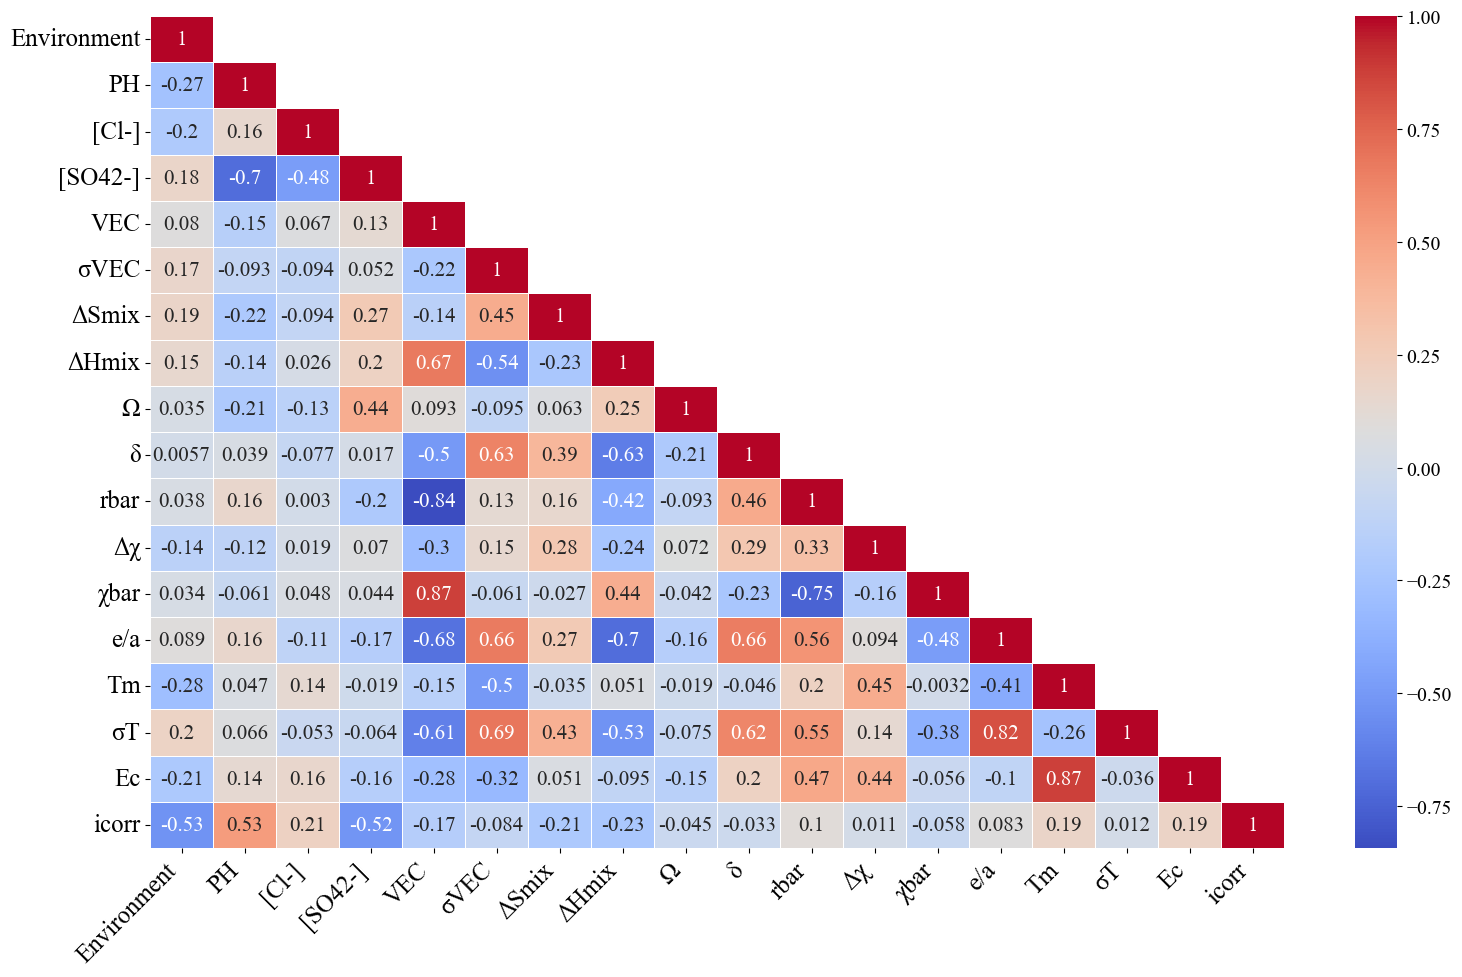

In [6]:
# Generate Pearson correlation coefficient matrix
P = dataset[['Environment', 'PH', '[Cl-]', '[SO42-]', 'VEC', 'σVEC', 'ΔSmix', 'ΔHmix', 'Ω', 'δ', 'rbar', 'Δχ', 'χbar', 'e/a', 'Tm', 'σT', 'Ec', 'icorr']]
corr=P.corr(method='pearson')

# Set image size, font size, font type
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Generate a matrix of the same size as the correlation matrix and set the elements on its main diagonal to 1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Plotting a heat map of the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 15}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [7]:
# Select features based on correlation coefficient
threshold = 0.8  # Set the correlation coefficient threshold
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('VEC', 'rbar'), ('VEC', 'χbar'), ('e/a', 'σT'), ('Tm', 'Ec')]


In [8]:
# According to the results of Pearson correlation analysis, some characteristic parameters are eliminated
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('χbar', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)

# Contains only ingredients

<Figure size 1000x800 with 0 Axes>

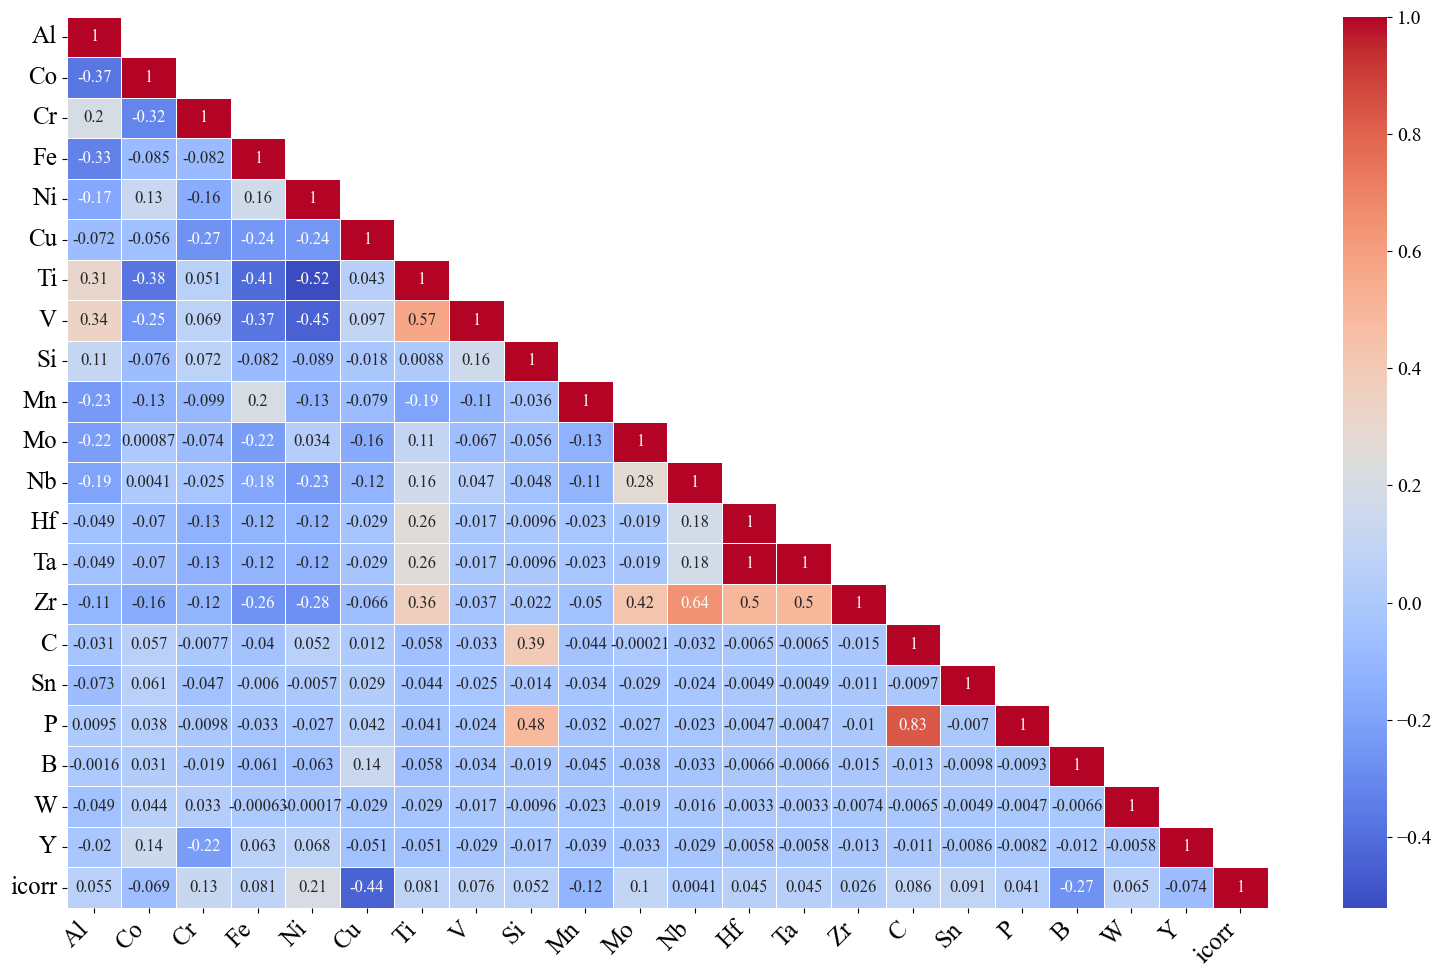

In [9]:
# Generate Pearson correlation coefficient matrix
P = dataset[['Al', 'Co', 'Cr', 'Fe', 'Ni', 'Cu', 'Ti', 'V', 'Si', 'Mn', 'Mo', 'Nb', 'Hf', 'Ta', 'Zr', 'C', 'Sn', 'P', 'B', 'W', 'Y', 'icorr']]
corr=P.corr(method='pearson')

# Set image size, font size, font type
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Generate a matrix of the same size as the correlation matrix and set the elements on its main diagonal to 1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Plotting a heat map of the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [10]:
# Select features based on correlation coefficient
threshold = 0.8  # Set the correlation coefficient threshold
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('Hf', 'Ta'), ('C', 'P')]


In [11]:
# According to the results of Pearson correlation analysis, some characteristic parameters are eliminated
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)

# Random Forest Model Feature Importance Analysis

In [ ]:
from sklearn.model_selection import train_test_split


# Split the data into x and y axes  
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Importance distribution of each feature： [8.80105115e-02 3.58723717e-01 2.34564140e-02 1.40107590e-03
 1.70774546e-02 1.86272417e-02 1.67447121e-02 2.35143105e-02
 1.42831261e-02 4.66166853e-02 4.29623775e-02 2.08142889e-02
 2.27414894e-02 1.46410319e-02 1.98117854e-02 9.29430407e-02
 2.58321664e-02 3.43937178e-02 5.97847898e-02 3.19410378e-02
 1.52598693e-03 8.99724554e-04 7.77253100e-03 1.35974484e-03
 9.48917414e-03 9.58174889e-05 2.38487135e-04 6.99225239e-04
 3.14100770e-03 3.14182682e-05 4.25908723e-04]


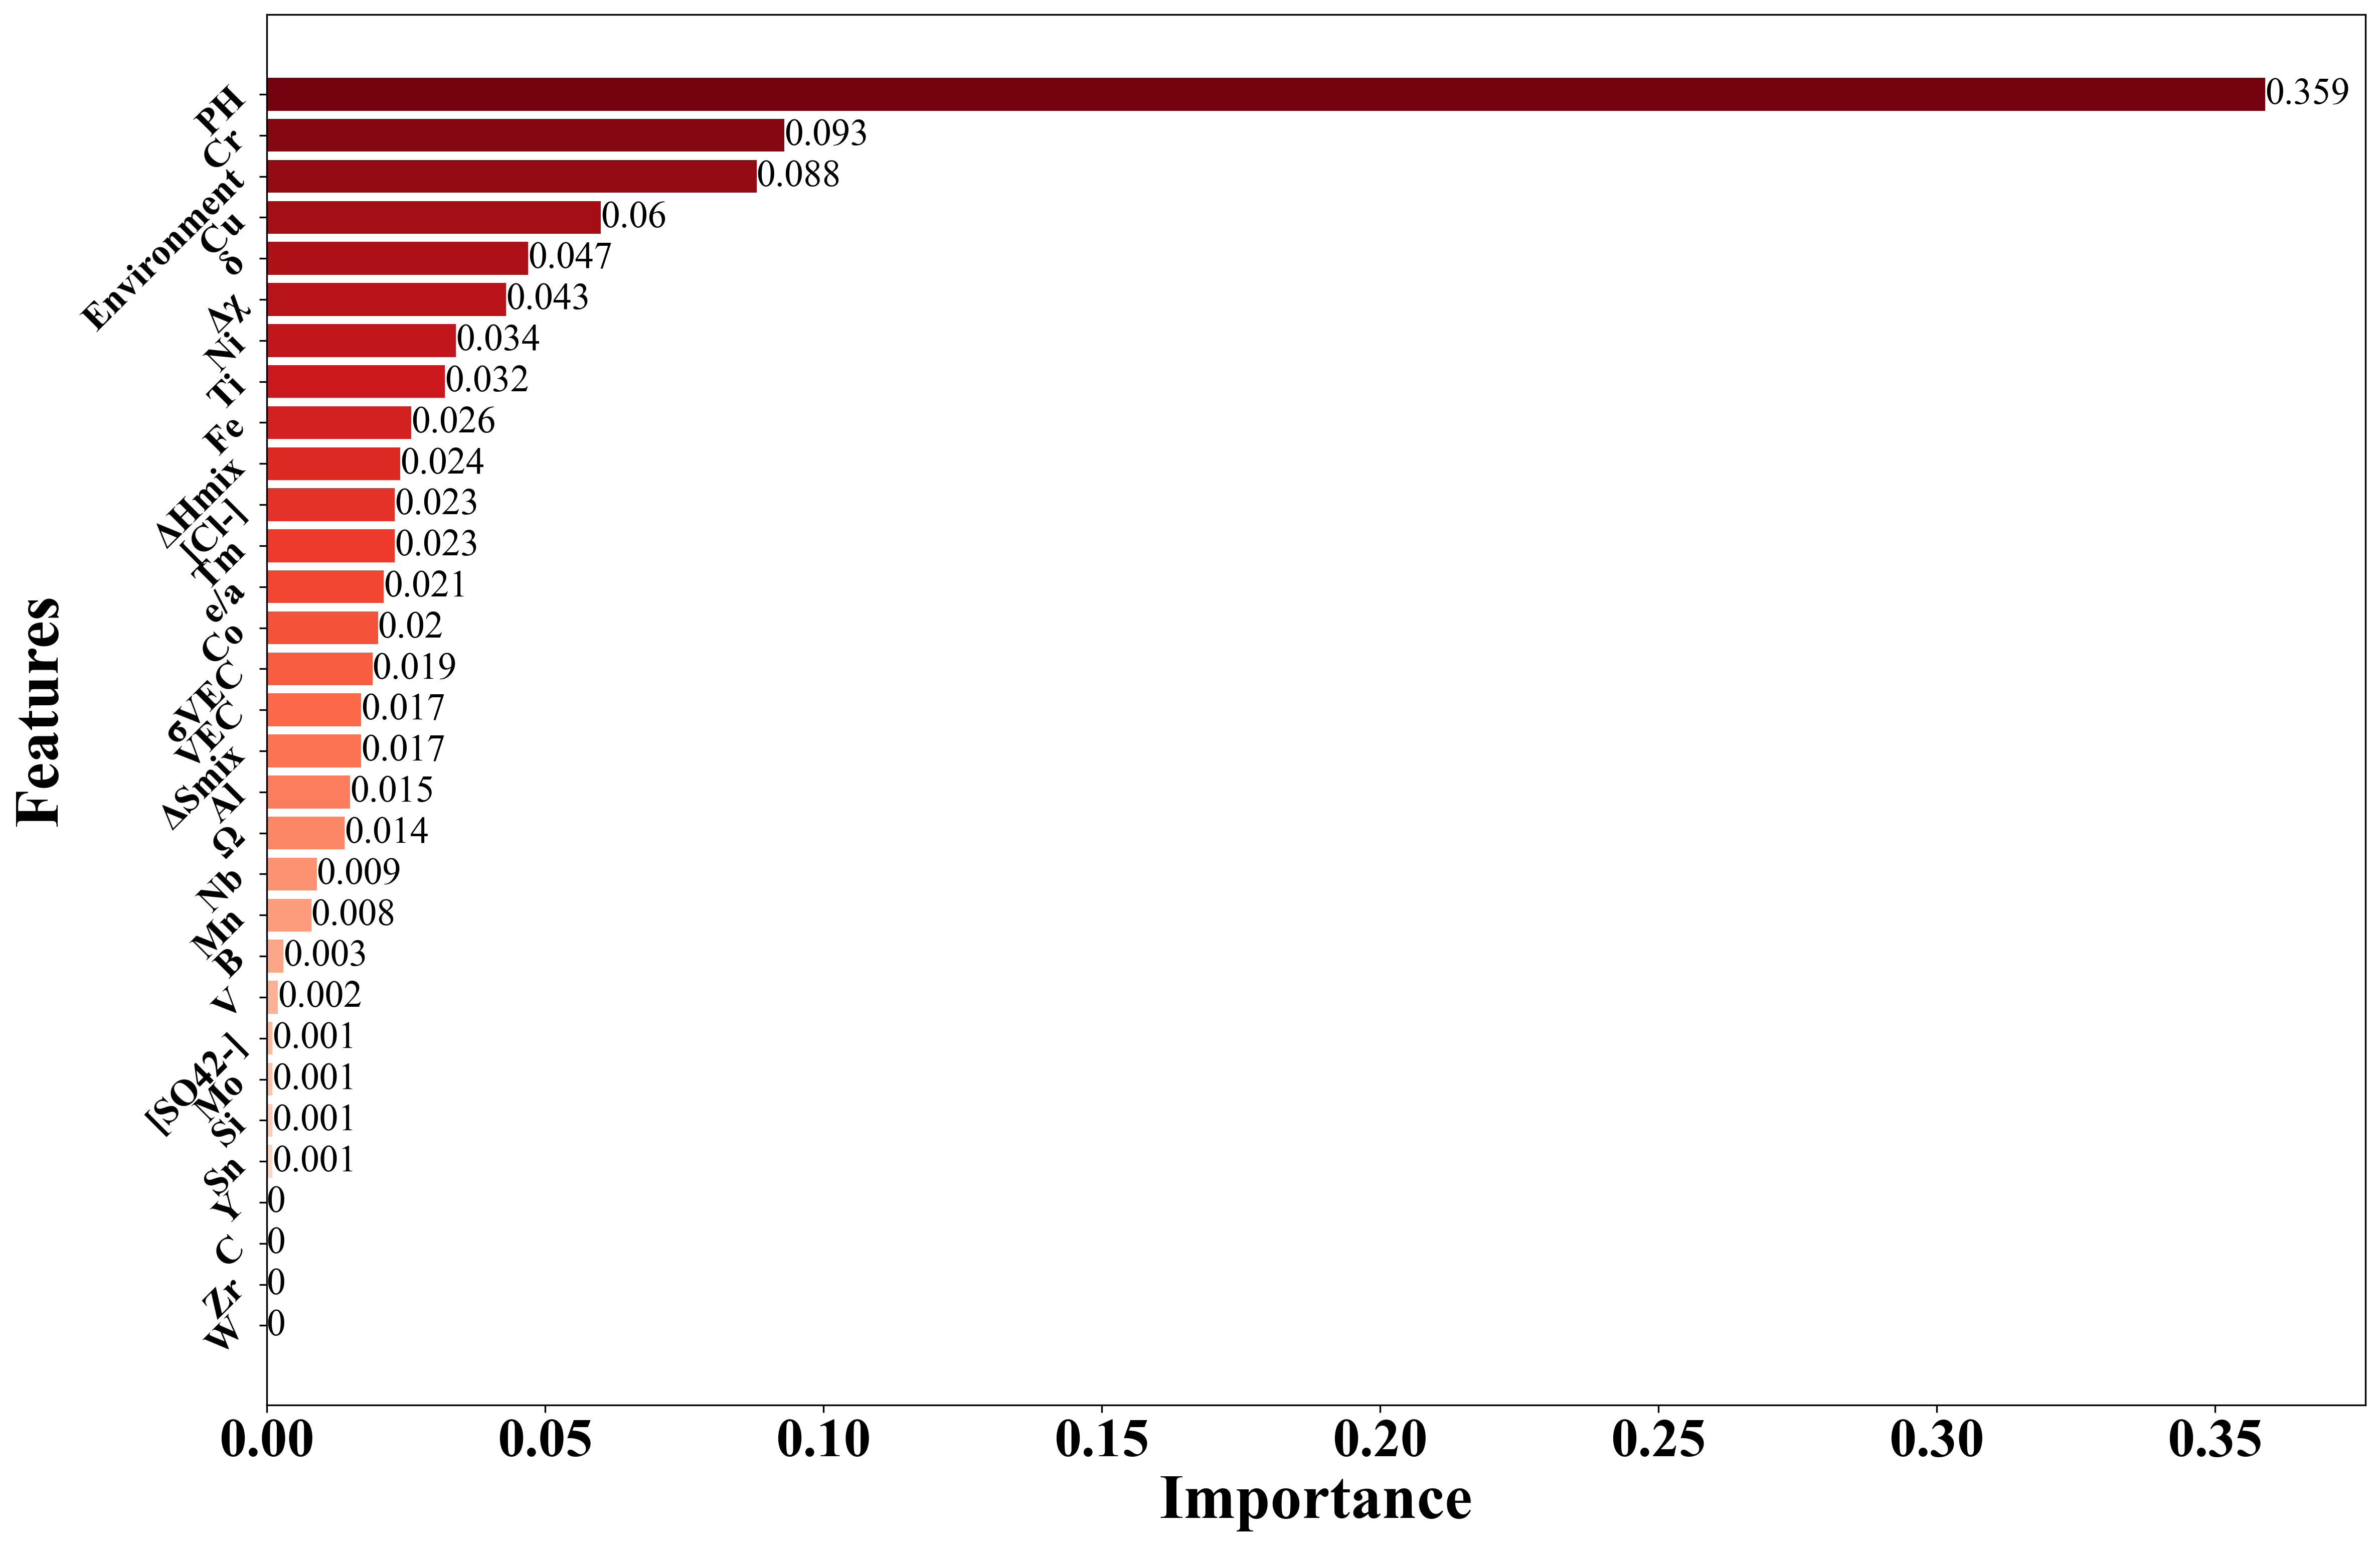

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# Get the name of the input feature
feature_names = dataset.columns[:-1]

rf = RandomForestRegressor()                               # Creating a Random Forest Regression Model
c = rf.fit(X_train, y_train).feature_importances_    # Feature Importance
print("Importance distribution of each feature：",c)

importances=pd.DataFrame(c,columns=['importance'])
feature_data=pd.DataFrame(feature_names,columns=['feature'])
importance=pd.concat([feature_data,importances],axis=1)
importance=importance.sort_values(['importance'],ascending=True)
values=np.around(importance['importance'].values,decimals=3)

# Create a red gradient color palette
red_palette = sns.color_palette("Reds", len(importance))

plt.figure(figsize=(18,12), dpi=300)
p1=plt.barh(importance['feature'],values,color=red_palette,label='values')
plt.bar_label(p1, label_type='edge',fontproperties={'family':'Times New Roman', 'weight':'normal', 'size':18})

plt.xlabel('Importance',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':30})
plt.ylabel('Features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':30})

plt.xticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':26})
plt.yticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':18}, rotation=45)

# Remove Legend
plt.legend().remove()
# plt.savefig("importance.png", dpi=300,format="png")
plt.show()

In [14]:
# According to the results of feature importance analysis, some feature parameters are eliminated
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Y', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 318
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   VEC          304 non-null    float64
 4   σVEC         304 non-null    float64
 5   ΔSmix        304 non-null    float64
 6   ΔHmix        304 non-null    float64
 7   Ω            304 non-null    float64
 8   δ            304 non-null    float64
 9   Δχ           304 non-null    float64
 10  e/a          304 non-null    float64
 11  Tm           304 non-null    float64
 12  Al           304 non-null    float64
 13  Co           304 non-null    float64
 14  Cr           304 non-null    float64
 15  Fe           304 non-null    float64
 16  Ni           304 non-null    float64
 17  Cu           304 non-null    float64
 18  Ti           304 non-null    float64
 19  Mn           

# Perform another Pearson correlation analysis on all the features after screening

<Figure size 1000x800 with 0 Axes>

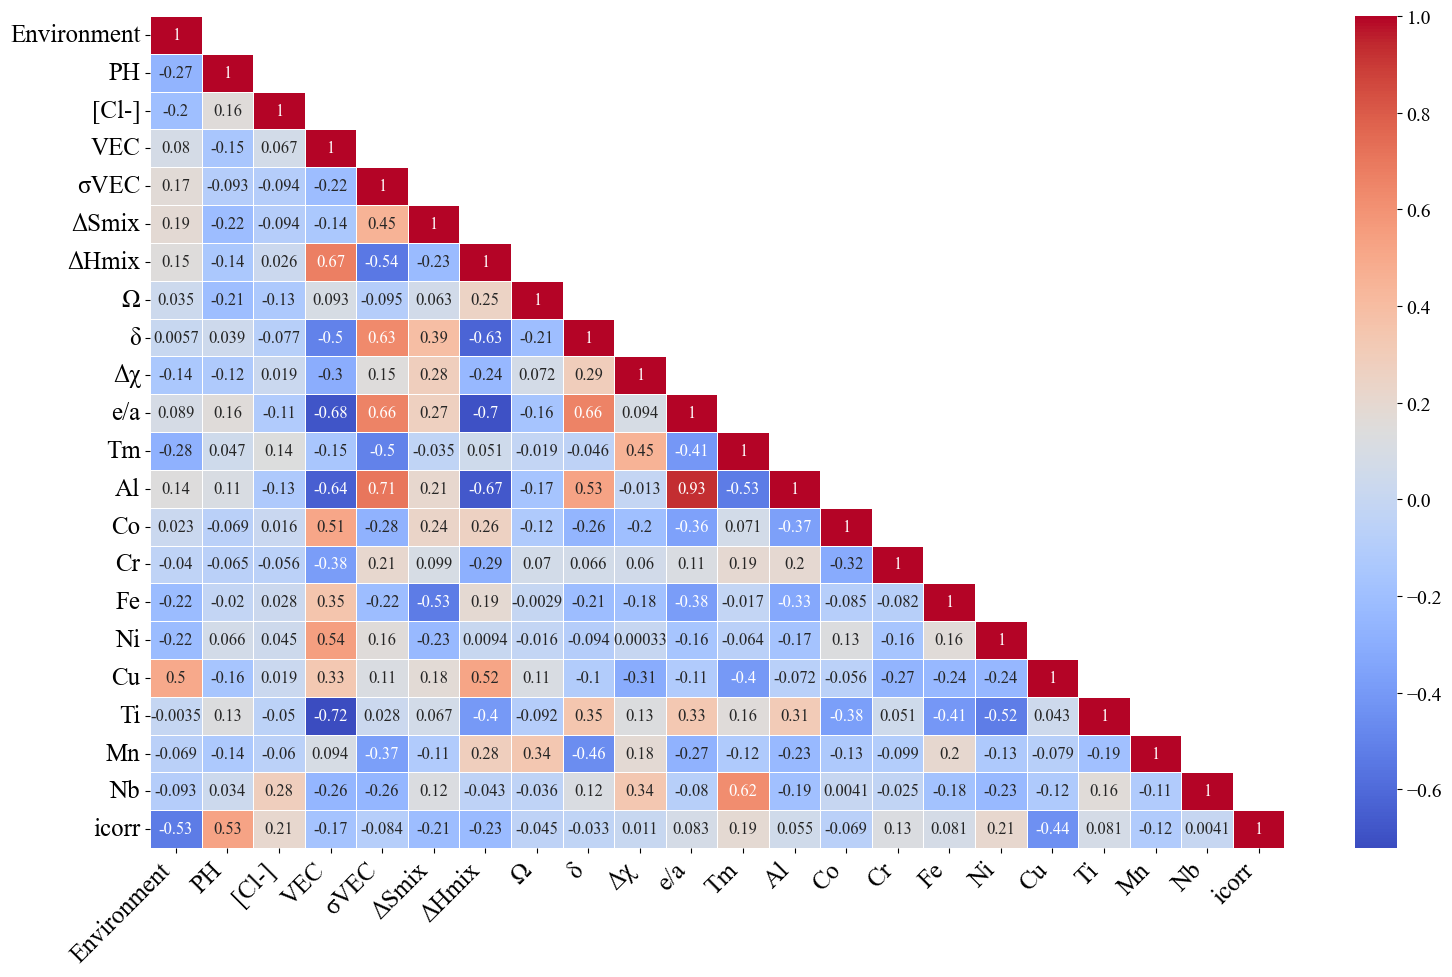

In [ ]:
# Generate Pearson correlation coefficient matrix
P = dataset[['Environment', 'PH', '[Cl-]', 'VEC', 'σVEC', 'ΔSmix', 'ΔHmix', 'Ω', 'δ', 'Δχ', 'e/a', 'Tm', 'Al', 'Co', 
             'Cr', 'Fe', 'Ni', 'Cu', 'Ti', 'Mn', 'Nb', 'icorr']]
corr=P.corr(method='pearson')

# Set image size, font size, font type
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Generate a matrix of the same size as the correlation matrix and set the elements on its main diagonal to 1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Plotting a heat map of the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [ ]:
# Select features based on correlation coefficient
threshold = 0.8  # Set the correlation coefficient threshold
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('e/a', 'Al')]


In [18]:
dataset = dataset.drop('Al', axis=1)

# Recursive Elimination

In [19]:
from sklearn.model_selection import train_test_split


# Split the data into x and y axes
y = dataset['icorr']
X = dataset.drop(['icorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


estimator = RandomForestRegressor()                               # Random Forest

print("Recursive feature elimination method to select the optimal feature combination")
score = []                                                            # Create a list
for i in range(1, 21, 1):
    selector = RFE(estimator, n_features_to_select=i,step=1)
    selector = selector.fit(X_train, y_train) # Optimal Features
    # Which features are selected as the final features, true means selected
    print(selector.support_)
    print(selector.ranking_)
    #  Selected several features
    print(selector.n_features_)
    once = -cross_val_score(estimator,selector.fit_transform(X_train, y_train), y_train, cv=5, scoring='neg_mean_squared_error').mean()                      # 交叉验证
    score.append(once)                                                           # Save cross-validation results to list
print(min(score), (score.index(min(score))*1)+1)               # Output the optimal classification result and the corresponding number of features
print(score)

Recursive feature elimination method to select the optimal feature combination
[False False False False False False False False False  True False False
 False False False False False False False False]
[ 7  2 13 15 16 17  8 18  4  1 10  9 14  3 12  6  5 11 20 19]
1
[False  True False False False False False False False  True False False
 False False False False False False False False]
[ 6  1 12 13 17 16  8 15  3  1 10  7 11  2  9  5  4 14 19 18]
2
[False  True False False False False False False False  True False False
 False  True False False False False False False]
[ 5  1 12 14 13 16  7 15  2  1  8  6 11  1 10  4  3  9 18 17]
3
[False  True False False False False False False  True  True False False
 False  True False False False False False False]
[ 4  1 10 14 13 15  5 12  1  1  7  6  9  1  8  3  2 11 17 16]
4
[False  True False False False False False False  True  True False False
 False  True False False  True False False False]
[ 4  1  7 14 13  8  5 12  1  1  6  2 10  1 11  3  

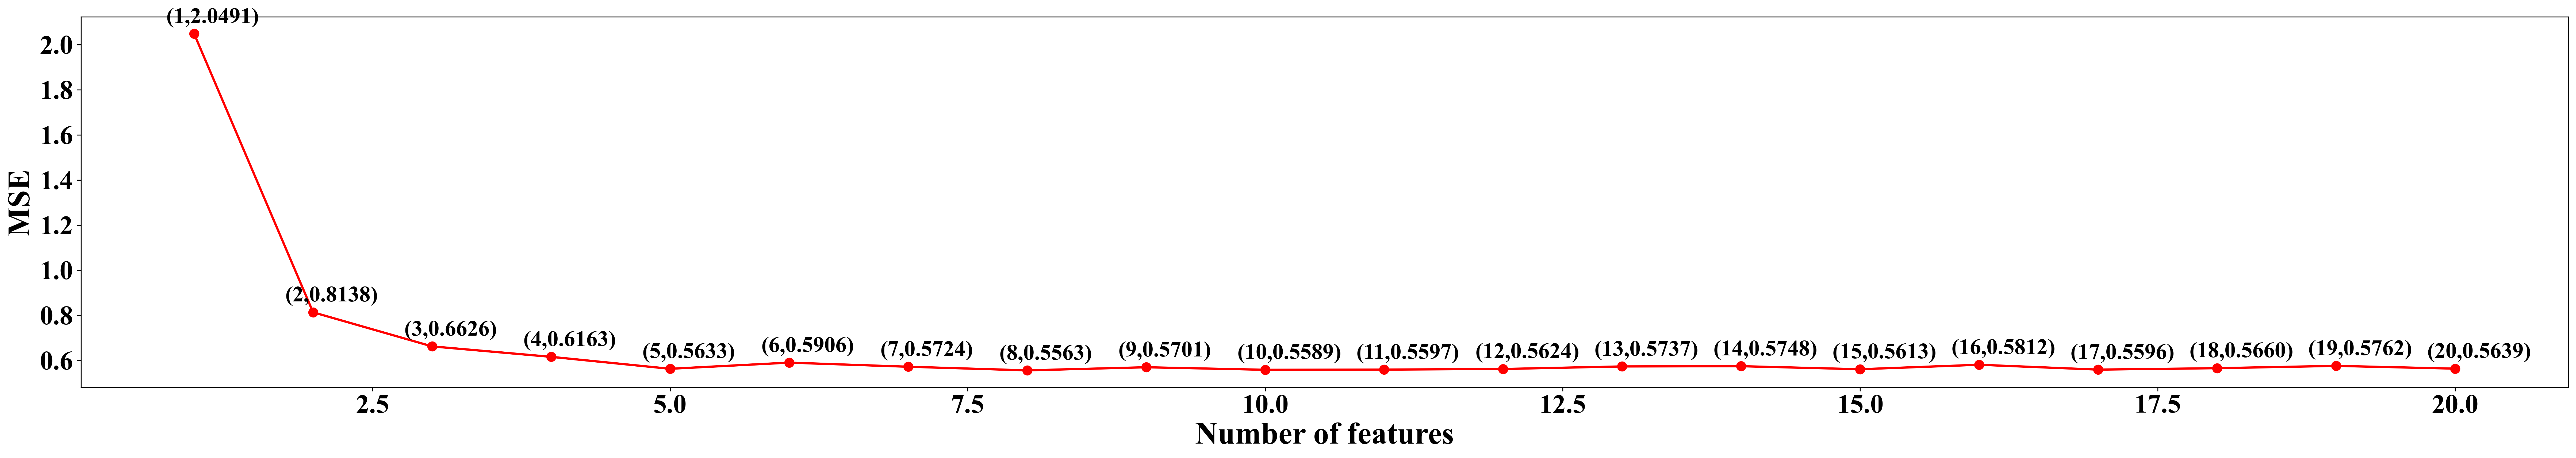

In [21]:
plt.figure(figsize=[40, 6], dpi=300)
plt.plot(range(1, 21, 1), score, marker='o', color='red', linewidth=2, markersize=8)

plt.xlabel('Number of features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':28})
plt.ylabel('MSE',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':28})

for xy in zip(range(1, 21, 1), score):
    plt.annotate("(%s,%.4f)" % xy, xy=xy, xytext=(-25, 10),textcoords='offset points',weight='bold',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':20})

plt.xticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.yticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})

plt.show()

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 318
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   VEC          304 non-null    float64
 4   σVEC         304 non-null    float64
 5   ΔSmix        304 non-null    float64
 6   ΔHmix        304 non-null    float64
 7   Ω            304 non-null    float64
 8   δ            304 non-null    float64
 9   Δχ           304 non-null    float64
 10  e/a          304 non-null    float64
 11  Tm           304 non-null    float64
 12  Co           304 non-null    float64
 13  Cr           304 non-null    float64
 14  Fe           304 non-null    float64
 15  Ni           304 non-null    float64
 16  Cu           304 non-null    float64
 17  Ti           304 non-null    float64
 18  Mn           304 non-null    float64
 19  Nb           

In [23]:
# According to the results of the recursive elimination method, some feature parameters are eliminated
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σVEC', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('Co', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Nb', axis=1)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  304 non-null    int64  
 1   PH           304 non-null    float64
 2   [Cl-]        304 non-null    float64
 3   ΔHmix        304 non-null    float64
 4   δ            304 non-null    float64
 5   Δχ           304 non-null    float64
 6   e/a          304 non-null    float64
 7   Tm           304 non-null    float64
 8   Cr           304 non-null    float64
 9   Fe           304 non-null    float64
 10  Ni           304 non-null    float64
 11  Cu           304 non-null    float64
 12  icorr        304 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 33.2 KB
